<a href="https://colab.research.google.com/github/anhtel94/CAP4630---Machine-Learning/blob/master/HW_3/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem 1**

Imports



In [0]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import L1L2
import random
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [0]:
def get_random_data(w, b, mu, sigma, m):
  data = np.random.rand(m, 2)
  labels = np.random.randint(2, size=(m, 1))

  samples = np.random.default_rng().normal(mu, sigma, 1000)

  for d, l, s in zip(data, labels, samples):
    if(l[0]):
      d[1] = w * d[0] + b + -1 * s
    else:
      d[1] = w * d[0] + b + s

  ##print(labels, data)
  return labels, data

  

In [0]:
def display_random_data(labels, data):
  for label, d in zip(labels, data):
    if(label):
      plt.plot(d[0], d[1], "r.")
    else:
      plt.plot(d[0], d[1], "b.")

  plt.xlabel("$x_1$", fontsize=18)
  plt.ylabel("$x_2$", rotation=0, fontsize=18)
  plt.axis([0, 1, -15, 15])
  plt.show()

In [0]:
## Constant for generate random data
w = 15
b = -8
mu = 2
sigma = 1
m = 100

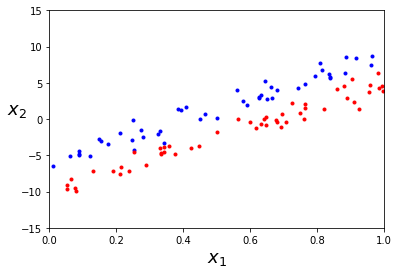

In [270]:
## Generate random data
labels, data = get_random_data(w, b, mu, sigma, m)

## Display scatter plot
display_random_data(labels, data)

In [0]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_labels, test_labels = train_test_split(data, labels, train_size=0.8, test_size=0.2)

**Problem 2**

In [0]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [273]:
model = models.Sequential()
model.add(layers.Dense(train_labels.shape[1],
                activation='sigmoid',
                kernel_regularizer=L1L2(l1=0.0,l2=0.1),
                input_dim=(train_data.shape[1])))
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(train_data, train_labels, epochs=20, batch_size=8,
          validation_data=(test_data,test_labels), verbos=1)

Epoch 1/20
10/10 [==============================] - 0s 12ms/step - loss: 2.9377 - accuracy: 0.4250 - val_loss: 2.5365 - val_accuracy: 0.4500
Epoch 2/20
10/10 [==============================] - 0s 5ms/step - loss: 2.1904 - accuracy: 0.4375 - val_loss: 1.8238 - val_accuracy: 0.4500
Epoch 3/20
10/10 [==============================] - 0s 4ms/step - loss: 1.5472 - accuracy: 0.4500 - val_loss: 1.2456 - val_accuracy: 0.5000
Epoch 4/20
10/10 [==============================] - 0s 4ms/step - loss: 1.0692 - accuracy: 0.4625 - val_loss: 0.8795 - val_accuracy: 0.5000
Epoch 5/20
10/10 [==============================] - 0s 5ms/step - loss: 0.8040 - accuracy: 0.5000 - val_loss: 0.7251 - val_accuracy: 0.5500
Epoch 6/20
10/10 [==============================] - 0s 4ms/step - loss: 0.7042 - accuracy: 0.5250 - val_loss: 0.6724 - val_accuracy: 0.5500
Epoch 7/20
10/10 [==============================] - 0s 5ms/step - loss: 0.6731 - accuracy: 0.6500 - val_loss: 0.6539 - val_accuracy: 0.7000
Epoch 8/20
10/10 [=

In [274]:
accuracy, loss = model.evaluate(test_data, test_labels, verbose=2)

1/1 - 0s - loss: 0.6239 - accuracy: 0.6500


In [0]:
def display_data(labels, data, w, b):
  for label, d in zip(labels, data):
    if(label):
      plt.plot(d[0], d[1], "r.")
    else:
      plt.plot(d[0], d[1], "b.")

  x = np.array(np.arrange(0, 1.1, 0.1))
  def true_line(x):
    return w * x + b

  y = true_line(x)

  plt.plot(x, y, 'c')

  weights = model.layers[0].get_weights()[0]
  bias = model.layers[0].get_weights()[1]

  x2 = data

  def model_line(x ,w ,b):
    return -1 * (w[0] * x + b) / w[1]
  y = model_line(x, weights, bias)
  
  plt.plot(x, y, 'm')

  plt.xlabel("$x_1$", fontsize=18)
  plt.ylabel("$x_2$", rotation=0, fontsize=18)
  plt.axis([0, 1, -15, 15])
  plt.show()

  display_data(labels, data, w, b)